In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)


In [2]:
from tightening_project.cache import CacheArtifact
from tightening_project.data.loader import TighteningLoader
from tightening_project.config import find_latest_csv, DATA_DIR

cache = CacheArtifact(app_name="tightening_project")
loader = TighteningLoader(cache)

csv_path = find_latest_csv()
print("DATA_DIR:", DATA_DIR)
print("Usando CSV:", csv_path.name)

res = loader.load_csv_cached(csv_path, force=True)  # force=True para auditar el CSV real
df_raw = res.df

print("Shape RAW:", df_raw.shape)
df_raw.head()



DATA_DIR: C:\Users\ngher\Desktop\analisis\tightening_project\data\raw
Usando CSV: TighteningProduct_December25_260115114143_1.csv
Shape RAW: (23486, 21)


,LIN_ID,LIN_Label,TU_ID,TU_Name,PS_ID,PS_Number,PS_Comment,STEP_ID,TorqueTarget,TorqueMinTolerance,TorqueMaxTolerance,STEP_AngleThreshold,STEP_AngleTarget,STEP_AngleMinTolerance,STEP_AngleMaxTolerance,Tool_ID,TOOL_Number,TOOL_SerialNumber,RES_DateTime,RES_FinalTorque,RES_FinalAngle
0,952890,PREMONTAJES,8112351,TU51-EABC-1,811235130,30,INV-3.X-DC-14-avellanados pletinas,112351301,14,13,15,2,0,15,999,811235151,51,23Q50478,2025-12-01 07:37:15 +1,14.101.351.737.976.000,4.832.606.506.347.650
1,952890,PREMONTAJES,8112351,TU51-EABC-1,811235130,30,INV-3.X-DC-14-avellanados pletinas,112351301,14,13,15,2,0,15,999,811235151,51,23Q50478,2025-12-01 07:37:19 +1,14.037.641.525.268.500,4.878.349.304.199.210
2,952890,PREMONTAJES,8112355,TU55-QS-1,81123555,5,INV-3.X-DC-45-pletinas terminales automa,811235551,45,44.5,49.5,5,0,0,1500,81123605,55,26012204225,2025-12-01 07:39:13 +1,5.132.999.897.003.170,12.000.000.476.837.100
3,952890,PREMONTAJES,8112355,TU55-QS-1,81123555,5,INV-3.X-DC-45-pletinas terminales automa,811235551,45,44.5,49.5,5,0,0,1500,81123605,55,26012204225,2025-12-01 07:39:28 +1,4.643.000.030.517.570,2.293.000.030.517.570
4,952890,PREMONTAJES,8112355,TU55-QS-1,81123555,5,INV-3.X-DC-45-pletinas terminales automa,811235551,45,44.5,49.5,5,0,0,1500,81123605,55,26012204225,2025-12-01 07:40:00 +1,4.943.000.030.517.570,208.5


In [3]:
schema = pd.DataFrame({
    "column": df_raw.columns,
    "dtype": [str(t) for t in df_raw.dtypes],
    "non_null": df_raw.notna().sum().values,
    "nulls": df_raw.isna().sum().values,
    "null_pct": (df_raw.isna().mean().values * 100).round(2),
})
schema.sort_values("null_pct", ascending=False).head(20)


,column,dtype,non_null,nulls,null_pct
0,LIN_ID,int64,23486,0,0.0
1,LIN_Label,object,23486,0,0.0
2,TU_ID,int64,23486,0,0.0
3,TU_Name,object,23486,0,0.0
4,PS_ID,int64,23486,0,0.0
5,PS_Number,int64,23486,0,0.0
6,PS_Comment,object,23486,0,0.0
7,STEP_ID,int64,23486,0,0.0
8,TorqueTarget,object,23486,0,0.0
9,TorqueMinTolerance,object,23486,0,0.0


In [4]:
dup_count = df_raw.duplicated().sum()
print("Duplicados exactos:", dup_count)

if dup_count > 0:
    df_raw[df_raw.duplicated(keep=False)].head(10)

Duplicados exactos: 0


In [5]:
from tightening_project.data.cleaning import clean_tightening_df

df_clean, report = clean_tightening_df(df_raw, decimals=2)
print(report)

print("Shape CLEAN:", df_clean.shape)
df_clean.head()


C:\Users\ngher\Desktop\analisis\tightening_project\src\tightening_project\data\cleaning.py:135: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  d2[datetime_col] = pd.to_datetime(d2[datetime_col], errors="coerce", utc=True)


CleaningReport(rows_in=23486, rows_out=23486, datetime_parsed=True, fixed_torque_rows=3568, fixed_angle_rows=0, dropped_rows_missing_essentials=0)
Shape CLEAN: (23486, 23)


,LIN_ID,LIN_Label,TU_ID,TU_Name,PS_ID,PS_Number,PS_Comment,STEP_ID,TorqueTarget,TorqueMinTolerance,TorqueMaxTolerance,STEP_AngleThreshold,STEP_AngleTarget,STEP_AngleMinTolerance,STEP_AngleMaxTolerance,Tool_ID,TOOL_Number,TOOL_SerialNumber,RES_DateTime,RES_FinalTorque,RES_FinalAngle,TorqueScaleApplied,AngleScaleApplied
0,952890,PREMONTAJES,8112351,TU51-EABC-1,811235130,30,INV-3.X-DC-14-avellanados pletinas,112351301,14.0,13.0,15.0,2,0.0,15.0,999.0,811235151,51,23Q50478,2025-12-01 06:37:15+00:00,14.10,48.32,1,1
1,952890,PREMONTAJES,8112351,TU51-EABC-1,811235130,30,INV-3.X-DC-14-avellanados pletinas,112351301,14.0,13.0,15.0,2,0.0,15.0,999.0,811235151,51,23Q50478,2025-12-01 06:37:19+00:00,14.03,48.78,1,1
2,952890,PREMONTAJES,8112355,TU55-QS-1,81123555,5,INV-3.X-DC-45-pletinas terminales automa,811235551,45.0,44.5,49.5,5,0.0,0.0,1500.0,81123605,55,26012204225,2025-12-01 06:39:13+00:00,51.32,1.20,1,1
3,952890,PREMONTAJES,8112355,TU55-QS-1,81123555,5,INV-3.X-DC-45-pletinas terminales automa,811235551,45.0,44.5,49.5,5,0.0,0.0,1500.0,81123605,55,26012204225,2025-12-01 06:39:28+00:00,46.43,2.29,1,1
4,952890,PREMONTAJES,8112355,TU55-QS-1,81123555,5,INV-3.X-DC-45-pletinas terminales automa,811235551,45.0,44.5,49.5,5,0.0,0.0,1500.0,81123605,55,26012204225,2025-12-01 06:40:00+00:00,49.43,208.50,1,1


In [6]:
ta_cols = [c for c in df_clean.columns if ("torque" in c.lower()) or ("angle" in c.lower())]

print("Torque/Angle columns:", len(ta_cols))
df_clean[ta_cols].dtypes.value_counts()


Torque/Angle columns: 11


float64    8
int64      2
object     1
Name: count, dtype: int64

In [7]:
nulls_clean = df_clean.isna().mean().sort_values(ascending=False) * 100
nulls_clean.head(20)


TorqueMinTolerance        1.375287
TorqueTarget              1.239036
TorqueMaxTolerance        0.212893
TU_Name                   0.000000
LIN_ID                    0.000000
LIN_Label                 0.000000
TU_ID                     0.000000
PS_Comment                0.000000
PS_Number                 0.000000
PS_ID                     0.000000
STEP_ID                   0.000000
STEP_AngleThreshold       0.000000
STEP_AngleTarget          0.000000
STEP_AngleMinTolerance    0.000000
STEP_AngleMaxTolerance    0.000000
Tool_ID                   0.000000
TOOL_Number               0.000000
TOOL_SerialNumber         0.000000
RES_DateTime              0.000000
RES_FinalTorque           0.000000
dtype: float64

In [8]:
key_candidates = [
    "RES_FinalTorque", "RES_FinalAngle",
    "TorqueTarget", "TorqueMinTolerance", "TorqueMaxTolerance",
    "STEP_AngleTarget", "STEP_AngleMinTolerance", "STEP_AngleMaxTolerance"
]
key_cols = [c for c in key_candidates if c in df_clean.columns]

df_clean[key_cols].describe().T[["min", "max", "mean", "std"]]


,min,max,mean,std
RES_FinalTorque,0.01,99.89,18.304091,19.851907
RES_FinalAngle,0.00,9226.98,56.905722,119.552245
TorqueTarget,0.00,80.00,18.145294,18.843733
TorqueMinTolerance,0.00,80.00,17.366873,18.930325
TorqueMaxTolerance,0.00,88.00,19.634185,20.694226
STEP_AngleTarget,0.00,1250.00,2.469556,54.226033
STEP_AngleMinTolerance,0.00,1200.00,15.155965,52.517467
STEP_AngleMaxTolerance,0.00,9999.00,1115.851571,720.463387


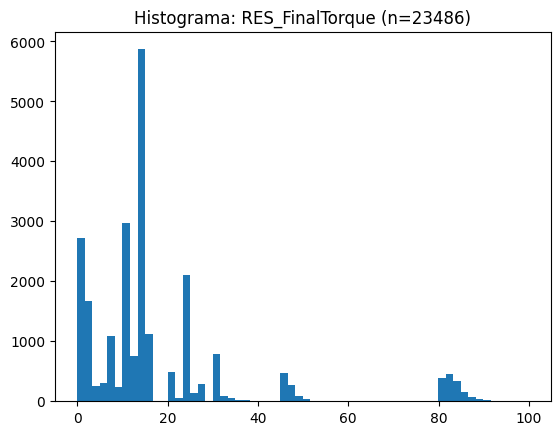

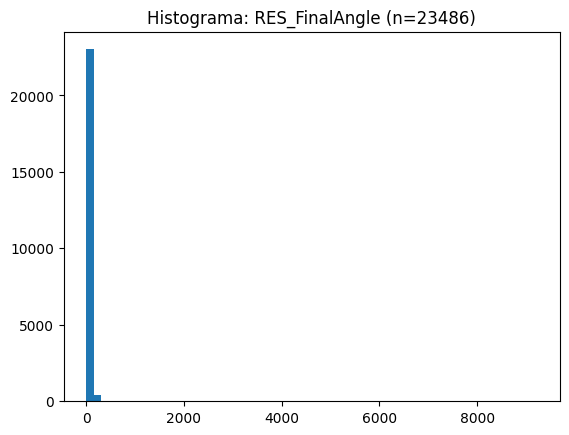

In [9]:
def hist_col(df, col, bins=60):
    x = df[col].dropna()
    plt.figure()
    plt.hist(x, bins=bins)
    plt.title(f"Histograma: {col} (n={len(x)})")
    plt.show()

if "RES_FinalTorque" in df_clean.columns:
    hist_col(df_clean, "RES_FinalTorque")

if "RES_FinalAngle" in df_clean.columns:
    hist_col(df_clean, "RES_FinalAngle")


In [10]:
from tightening_project.features.build import build_features

df_feat = build_features(df_clean)

if "tightening_ok" in df_feat.columns:
    ok_rate = df_feat["tightening_ok"].mean()
    print("OK rate:", round(ok_rate * 100, 2), "%")
    print(df_feat["tightening_ok"].value_counts())
else:
    print("No se pudo crear tightening_ok (faltan columnas de tolerancia).")


OK rate: 86.65 %
tightening_ok
1    20350
0     3136
Name: count, dtype: int64


In [11]:
group_candidates = ["LIN_Label", "TU_Name", "Tool_ID", "TOOL_SerialNumber", "PS_Comment", "PS_Number"]
group_cols = [c for c in group_candidates if c in df_feat.columns]

print("Group cols detectadas:", group_cols)

if "tightening_ok" in df_feat.columns and group_cols:
    grp = group_cols[0]  # primera disponible
    summary = (
        df_feat.groupby(grp)
        .agg(
            n=("tightening_ok", "size"),
            ok_rate=("tightening_ok", "mean"),
            torque_mean=("RES_FinalTorque", "mean") if "RES_FinalTorque" in df_feat.columns else ("tightening_ok","mean"),
            torque_std=("RES_FinalTorque", "std") if "RES_FinalTorque" in df_feat.columns else ("tightening_ok","std"),
        )
        .sort_values("ok_rate")
    )
    summary.head(20)


Group cols detectadas: ['LIN_Label', 'TU_Name', 'Tool_ID', 'TOOL_SerialNumber', 'PS_Comment', 'PS_Number']
